![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm

# Parte 1: Erros de interpolação

## Questão 1: Polinômios de grau 2

Seja $f$ uma função e $P$ o polinômio interpolador de grau 2 determinado por
$f(a)$, $f(0)$ e $f(-a)$.

Escreva uma função que, dados $f$ e $a$, retorna os coeficientes de $P$,
do menor ao maior grau.

In [2]:
def coefs_grau2(f, a):
    ys = [f(a), f(0), f(-a)]
    xs = [a, 0, -a]
    M = []
    for x in xs:
        linha = [1, x, x**2]
        M.append(linha)

    return np.linalg.solve(M,ys)


In [3]:
def f1(x): return x**2
c1 = coefs_grau2(f1, 1)
assert np.allclose(c1, [0,0,1], atol=1e-12, rtol=1e-12)

In [4]:
def f1(x): return x**2
c1 = coefs_grau2(f1, 0.5)
assert np.allclose(c1, [0,0,1], atol=1e-12, rtol=1e-12)

In [5]:
c_sin = coefs_grau2(np.sin, 1)
assert np.allclose(c_sin, [0,np.sin(1),0], atol=1e-12, rtol=1e-12)

c_sin = coefs_grau2(np.sin, 0.7)
assert np.allclose(c_sin, [0,np.sin(0.7)/0.7,0], atol=1e-12, rtol=1e-12)

Explique porque é tão fácil calcular os coeficientes do polinômio para o seno. (sem resolver o sistema linear!)

Como, para a função sen, f(a) = -f(a) já que se trada de uma função ímpar.Considere os coeficientes [c_1, c_2, c_3], o sistema fica simples de resolver bastando somar as linhas para obter o valor de $c_2 = f(a)/a$ e subtrair as linhas para obter $c_3$ que é igual a zero pelo fato de $c_1$ também ser zero (sabemos disso pois zero é ponto de interpolação).

E porque os coeficientes para `f1` não mudaram?

O polinômio interpolador de grau n de um função que é um polinômio de grau n é o prórpio polinômio de grau n. Assim, como $f_1$ é o polinômio $x^2$ seu polinômio interpolador de grau 2 será $x^2$ independentemente dos pontos escolhidos para interpolação. 

In [6]:
c_exp = coefs_grau2(np.exp, 1)
assert np.allclose(c_exp, [1, 1.17520119, 0.54308063])

c_exp = coefs_grau2(np.exp, 0.5)
assert np.allclose(c_exp, [1, 1.04219061, 0.51050386])

## Questão 2: Erros

Seja $f$ uma função e $P$ o seu polinômio interpolador, dado por seus coeficientes.

Escreva uma função que, dados `f`, `coefs` e um `ndarray` `ts`, calcula o vetor dos erros (com sinal)
entre $f$ e $P$ ao longo dos pontos em `ts`.

Dica: use `np.polyval` (e leia a ajuda)

In [7]:
def erros(f, coefs, ts):
    coefs = coefs[::-1]
    values = np.array([ np.polyval(coefs, t)  for t in ts])
    ys = np.array([f(t) for t in ts])
    return ys- values

In [8]:
err_exp = erros(np.exp, [1, 1, 1/2], [0, 1, -1])
assert np.allclose(err_exp, [ 0.        ,  0.21828183, -0.13212056])

In [9]:
err_exp = erros(np.exp, [1, 1, 1/2], [0, 1/2, -1/2])
assert np.allclose(err_exp, [ 0.        ,  0.02372127, -0.01846934])

In [10]:
err_sin = erros(np.sin, [0, 1, 0], [0,1,2,3,np.pi])
assert np.allclose(err_sin, [ 0.        , -0.15852902, -1.09070257, -2.85887999, -3.14159265])

## Questão 3: Gráficos de erros

Faça, para a função seno, o gráfico dos erros para 100 pontos no intervalo $[-1,1]$,
correspondente aos polinômios interpoladores de grau 2, ao variar $a$ de $0.1$ até $1.0$.

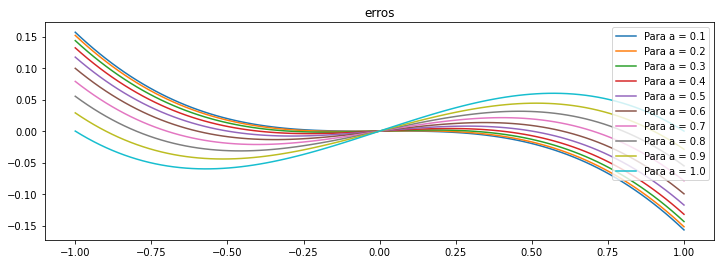

In [11]:
fig, ax = plt.subplots(ncols=1, figsize=(12,4))
ers = []
a_s =  np.arange(0.1, 1.1, 0.1)
for a in a_s:
    ys =  np.linspace(-1, 1, 100)
    er = erros(np.sin, coefs_grau2(np.sin, round(a, 1)), ys)
    ers.append(er)
    plt.plot(ys, er, label=f"Para a = {round(a, 1)}")
plt.title("erros")
plt.legend()


In [12]:
assert len(ax.lines) >= 10
assert len(ax.get_legend().texts) >= 10

## Questão 4: Estatísticas dos erros

Qual a soma dos erros, para cada valor de $a$?

Imprima uma tabela com os valores de $a$ e o valor da soma, usando `print()` formatado.

In [13]:
su = [ np.sum(er) for er in ers]


print("a    |   soma dos erros")
print(40*"-")
for (a, s) in zip(a_s, su):
    print(round(a, 1), end=" | ")
    print(s)


a    |   soma dos erros
----------------------------------------
0.1 | -1.2212453270876722e-15
0.2 | -1.2212453270876722e-15
0.3 | -1.1102230246251565e-15
0.4 | -9.43689570931383e-16
0.5 | -9.43689570931383e-16
0.6 | -7.771561172376096e-16
0.7 | -6.106226635438361e-16
0.8 | -2.220446049250313e-16
0.9 | -4.163336342344337e-16
1.0 | 5.551115123125783e-17


Agora, faça uma tabela com a soma dos valores **absolutos** dos erros, para cada valor de $a$.

In [14]:
sum_a = [ np.sum(abs(er)) for er in ers]


print("  a  |  soma dos erros absolutos")
print(40*"-")
for (a, s) in zip(a_s, sum_a):
    print(round(a, 1), end=" | ")
    
    print(s)


  a  |  soma dos erros absolutos
----------------------------------------
0.1 | 4.066713333575328
0.2 | 3.827205383020329
0.3 | 3.4623822338515478
0.4 | 3.0230794495150053
0.5 | 2.5790783372348267
0.6 | 2.2177422809191114
0.7 | 2.0422985340893396
0.8 | 2.1697911395520366
0.9 | 2.728735642099987
1.0 | 3.8565108513854467


Enfim, uma tabela para o maior erro (em valor absoluto), dentre os 100 pontos, para cada valor de $a$.

In [15]:
maxs = [ np.sum(max(er)) for er in ers]


print("  a  |  soma dos erros absolutos")
print(40*"-")
for (a, m) in zip(a_s, maxs):
    print(round(a, 1), end=" | ")
    print(m)


  a  |  soma dos erros absolutos
----------------------------------------
0.1 | 0.15686318166038504
0.2 | 0.15187566916740958
0.3 | 0.14359637072990206
0.4 | 0.13207487096372972
0.5 | 0.1173800924005095
0.6 | 0.09959980418382919
0.7 | 0.07883999696023358
0.8 | 0.05522412881650696
0.9 | 0.044297767745150096
1.0 | 0.05998709202465069


## Questão 5: Gráficos das estatísticas

Crie um dicionário que associa, a cada valor de $a$ abaixo,
o `array` dos erros nos 100 pontos do intervalo $[-1,1]$.

In [16]:
lista_a = np.linspace(0.1, 1.0, num=91)
d = {}

for a in lista_a:
    ys =  np.linspace(-1, 1, 100)
    er = erros(np.sin, coefs_grau2(np.sin, a), ys)
    d[a] = er 

Agora, faça, num mesmo eixo, os gráficos dos 3 erros, em função de $a$.

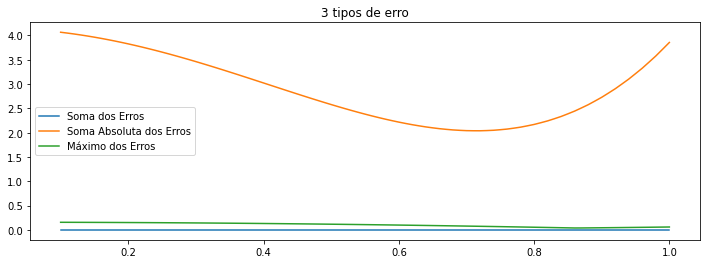

In [17]:
fig, ax = plt.subplots(ncols=1, figsize=(12,4))


soma = [np.sum(er) for er in d.values()]
soma_abs = [np.sum(abs(er)) for er in d.values()]
maximo = [np.max(er) for er in d.values()]

plt.title("3 tipos de erro")
plt.plot(d.keys(), soma, label="Soma dos Erros")
plt.plot(d.keys(), soma_abs, label="Soma Absoluta dos Erros")
plt.plot(d.keys(), maximo, label="Máximo dos Erros")
plt.legend()

In [18]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

O gráfico acima tem 2 problemas:
- A soma dos erros é sempre muito pequena
- A soma dos valores absolutos dos erros é bem maior do que o maior erro.

Explique porque eles acontecem.

Isso acontece porque alguns erros se cancelam quando não consideramos o valor absoluto deles. Lembrando que estamos tentando aproximar uma função seno por um polinômio de grau 2. Esse cancelamento tem a ver com o fato de a função seno ser ímpar e trocar de concavidade o que não acontece com um polinômio de grau 2. Assim, terão regiões em que o polinômio majora a função e regiões em que ele subestima a função praticamente na mesma proporção.

A soma dos erros ser bem maior significa que o total de erro não é causado pelo ponto que gera mais erro, ou seja, existe uma distribuição de erros em vários pontos da função. 

Para comparar melhor a soma dos erros absolutos com o maior erro no intervalo $[-1,1]$,
poderíamos normalizar a soma (por exemplo, dividindo pelo número de termos).

Mas também podemos usar dois eixos separados, com um `subplot`.
Refaça os gráficos, para estes dois critérios de erro.

Text(0.5, 1.0, 'Máximo dos Erros')

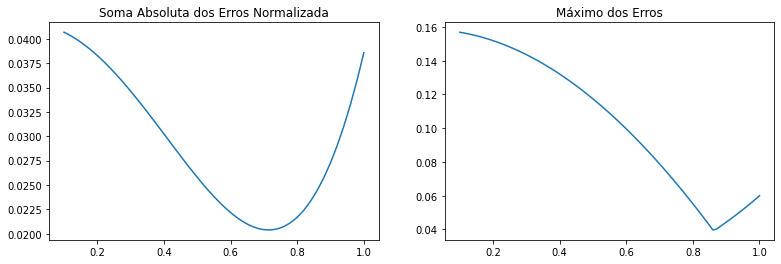

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4))

soma_abs = [np.sum(abs(er))/len(er) for er in d.values()]
maximo = [np.max(er) for er in d.values()]

axs[0].plot(d.keys(), soma_abs)
axs[1].plot(d.keys(), maximo)
axs[0].set_title("Soma Absoluta dos Erros Normalizada")
axs[1].set_title("Máximo dos Erros")

O gráfico do erro da soma parece ser suave, enquanto o gráfico para o máximo do erro, não.
Porque você acha que isso acontece?

YOUR ANSWER HERE

## Questão 6: E a exponencial?

Refaça a figura com o comportamento dos **três** erros (em eixos separados) para a exponencial.

Text(0.5, 1.0, 'Máximo Erros')

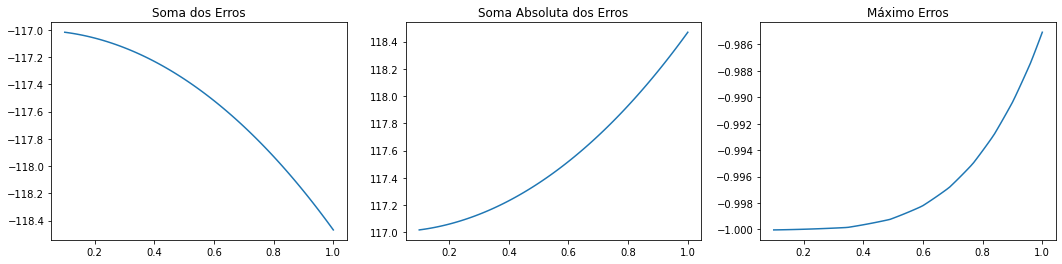

In [20]:
fig, axs = plt.subplots(ncols=3, figsize=(18,4))


lista_a = np.linspace(0.1, 1.0, num=91)
d = {}

for a in lista_a:
    ys =  np.linspace(-1, 1, 100)
    er = erros(np.sin, coefs_grau2(np.exp, a), ys)
    d[a] = er 


soma = [np.sum(er) for er in d.values()]
soma_abs = [np.sum(abs(er)) for er in d.values()]
maximo = [np.max(er) for er in d.values()]

axs[0].plot(d.keys(), soma)
axs[1].plot(d.keys(), soma_abs)
axs[2].plot(d.keys(), maximo)
axs[0].set_title("Soma dos Erros")
axs[1].set_title("Soma Absoluta dos Erros")
axs[2].set_title("Máximo Erros")

O que você deduz destes gráficos?

Agora, a soma dos erros é sempre negativa, ou seja, nosso polinômio de grau 2 está majorando a função na maioria dos casos. O valor máximo dos erros também é sempre negativo.

## Questão 7: Uma integral

Calcule o erro entre
1. a integral do polinômio interpolador $P_a$ em $[-1,1]$, e
2. a integral da exponencial no mesmo intervalo.

Faça um gráfico em função de $a$.

NotImplementedError: 

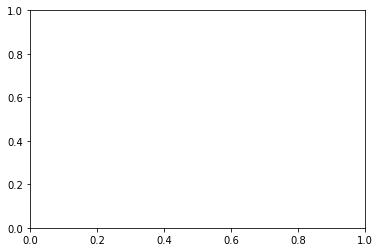

In [21]:
fig, ax = plt.subplots(ncols=1, figsize=(6,4))

# YOUR CODE HERE
raise NotImplementedError()

Esse gráfico se parece com algum dos anteriores? Qual? Porque você acha que isso acontece?

YOUR ANSWER HERE

# Autovalores de matrizes simétricas

Vimos em sala que matrizes simétricas têm autovalores ortogonais.

Vamos usar esta propriedade para estender o método da potência para encontrar os 2 maiores autovalores,
com seus autovetores correspondentes.

## Questão 8: Iteração de potência

Dê abaixo o método de iteração de potência para uma matriz $A$, começando com o vetor $u_0$.

Use como critério de parada a distância (relativa) entre $Au_k$ e $\lambda_k u_k$,
onde $\lambda_k$ é a estimativa atual do autovalor.

Retorne todos os vetores $u_k$ produzidos (e normalizados), assim como os $\lambda_k$.

In [ ]:
def iteracao_potencia(A, u0, tol=1e-6, maxiter=100):
    A = np.asarray(A)
    n,m = np.shape(A)
    assert n==m, 'A must be square'
    v = u0/norm(u0)
    ls = []
    vs = []
    for _ in range(maxiter):
        v = A@v
        v /= norm(v)
        vs.append(v)
        lamda = np.dot(v, A@v)
        ls.append(lamda)
        erro = norm(A@v - lamda*v)
        if(erro <= tol):
            break
    return (vs, ls)


In [ ]:
A = [[0,1],[2,1]]
us, ls = iteracao_potencia(A, [1.0,0])

assert 10 < len(ls) < 30

In [ ]:
A = [[0,1],[2,1]]
us, ls = iteracao_potencia(A, [1.0,0])

assert np.isclose(ls[-1], 2)
assert np.allclose(us[-1], [0.44721385, 0.89442706], atol=1e-6)
assert np.allclose(us[-5], [0.44721385, 0.89442706], atol=1e-6)

Vimos acima que `us[-1]` e `us[-5]` estão próximos do mesmo vetor, com tolerância `1e-6`.
Ora, a tolerância de parada é `1e-6`.

O que você acha que fez a função continuar iterando?

Isso tem a ver com o fato de os autovalores ainda não estarem próximos o suficiente. A tolerândia é calculada em função dos autovalores segunda a função de erro $||Av_k - \lambda_k v_k||$.

In [ ]:
print(ls[-1])
print(ls[-5])

2.0000002861020763
2.0000045775808393


In [ ]:
A = [[0,1,2],[3,2,1],[1,2,4]]
us, ls = iteracao_potencia(A, [1.0,1,1])

assert 5.7 < ls[-1] < 5.8
assert 5 < len(ls) < 15

## Dois autovetores

Vamos adaptar o método anterior para calcular dois autovetores.
O algoritmo é o seguinte:
1. Comece com dois vetores $u_0$ e $v_0$, com $v_0$ ortogonal a $u_0$ (ou seja, $u_0 \cdot v_0 = 0$);
2. Seja $k = 0$;
3. Calcule $u_{k+1} = \frac{A u_k}{\| A u_k \|}$ como na iteração de potência;
4. Calcule $w = A v_k$, e retire a componente de $w$ na direção de $u_{k+1}$, para que $\hat{w} \cdot u_{k+1} = 0$
5. Normalize $\hat{w}$ para definir $v_{k+1}$
6. Calcule os produtos de Rayleigh $u_{k+1} \cdot u_k$ e $v_{k+1} \cdot v_k$, para estimar os autovalores;
7. Teste a convergência tanto de $u_{k+1}$ como de $v_{k+1}$
    * Se convergiu, retorne
    * Senão, faça $k = k+1$ e volte para 3.

## Questão 9: Projeção ortogonal

A primeira etapa que falta programar é retirar a componente de $w$ na direção de $u$.
Escreva esta função.

In [ ]:
def retirar_componente(w,u):
    w = np.asarray(w)
    u = np.asarray(u)
    assert np.isclose(norm(u), 1) # Para facilitar
    return w - (np.dot(w, u)/norm(u))*u

In [ ]:
v = retirar_componente([1,2], [0,1])
assert np.allclose(v, [1,0])

In [ ]:
v = retirar_componente([1,2,3,4], [0,0,1,0])
assert np.allclose(v, [1,2,0,4])

In [ ]:
v = retirar_componente([1,2,3,4], [1/2,1/2,1/2,1/2])
assert np.allclose(v, [-3/2,-1/2,1/2,3/2])

Dê, na caixa abaixo, mais dois testes para sua função `retirar_componente`.

In [ ]:
v = retirar_componente([1,0,3], [1, 0, 0])
assert np.allclose(v, [0, 0, 3])

v = retirar_componente([1,0,3], [0, 0, 1])
assert np.allclose(v, [1, 0, 0])


## Questão 10: A iteração dupla

Agora, complete a iteração dupla da potência, retornando:
- Os candidatos ao "maior" autovetor
- Os candidatos ao maior autovalor
- Os candidatos ao "segundo" autovetor
- Os candidatos ao segundo autovalor.

(Ou seja, os dois primeiros são exatamente como na iteração de potência)

O algoritmo só pode convergir se **ambos** os vetores estiverem próximos dos autovetores correspondentes!

In [ ]:
def iteracao_potencia2(A, u0, v0, tol=1e-6, maxiter=100):
    A = np.asarray(A)
    n,m = np.shape(A)
    ls1, ls2, vs1, vs2 = [], [], [], []
    assert n==m, 'A must be square'
    for _ in range(maxiter):
        u = (A@u0)/(norm(A@u0))
        w = A@v0
        w = retirar_componente(w, u)
        v = w/norm(w)
        lamda1 = np.dot(u, A@u)
        lamda2 = np.dot(v, A@v)
        ls1.append(lamda1)
        ls2.append(lamda2)
        vs1.append(u)
        vs2.append(v)
        if(norm(A@u - lamda1*u) <= tol and norm(A@v - lamda2*v) <= tol):
            return (vs1, ls1, vs2, ls2)
        v0 = v
        u0 = u
    return (vs1, ls1, vs2, ls2)

In [ ]:
A = [[0,1],[1,2]]
us, ls, vs, ms = iteracao_potencia2(A, [1.0,0], [1.0,1])


In [ ]:
A = [[0,1],[1,2]]
us, ls, vs, ms = iteracao_potencia2(A, [1.0,0], [1.0,1])

assert 5 < len(ls) < 20

In [ ]:
A = [[0,1],[1,2]]
us, ls, vs, ms = iteracao_potencia2(A, [1.0,0], [1.0,1])

assert np.isclose(ms[-1], 1-np.sqrt(2))

In [ ]:
A = [[1,2,3], [2,3,4], [3,4,5]]
us, ls, vs, ms = iteracao_potencia2(A, [1.0,0,0], [1.0,1,0])

assert 4 <= len(ls) <= 15

Como você faria para verificar que os vetores retornados acima de fato estão próximos dos autovetores de $A$?

Explique na caixa abaixo a sua ideia, e depois faça as contas.

Sabemos que se a matriz é simétrica seus autovetores são ortogonais, então. Podemos verticar se o produto interno entre os autovetores retornados é próximo de zero.

In [ ]:
np.dot(us[-1], vs[-1])

5.551115123125783e-17

## Questão 11: Gráficos

Faça o gráfico da evolução dos dois maiores autovalores, para a matriz `A` abaixo.

Text(0.5, 1.0, 'Evolução dos autovalores')

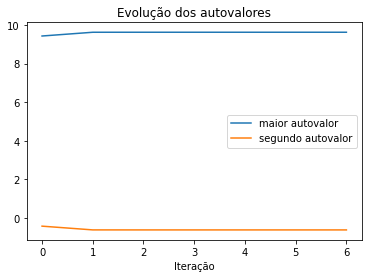

In [ ]:
A = [[1,2,3], [2,3,4], [3,4,5]]

fig, ax = plt.subplots(ncols=1)

us, ls, vs, ms = iteracao_potencia2(A, [1.0,0,0], [1.0,1,0])

plt.plot(ls, label="maior autovalor")
plt.plot(ms, label="segundo autovalor")
plt.legend()
plt.xlabel("Iteração")
plt.title("Evolução dos autovalores")



In [ ]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

In [ ]:
assert len(ax.get_title()) > 0
assert len(ax.get_xlabel()) > 0

Agora, faça o gráfico do erro (absoluto) ao longo das iterações

In [ ]:
A = [[1,2,3], [2,3,4], [3,4,5]]

fig, ax = plt.subplots(ncols=1)
# YOUR CODE HERE
raise NotImplementedError()

Os erros continuam decaindo exponencialmente rápido para o segundo autovalor?

YOUR ANSWER HERE

Repita o gráfico dos erros (absolutos) para uma matriz ligeiramente diferente:

In [ ]:
A = [[1,0,0],[0,2,0],[0,0,3]]
ev = np.linalg.eigvals(A)
ev[1:]/ev[:-1]

In [ ]:
A = [[1,2,3], [2,3,4], [3,4,6]]

fig, ax = plt.subplots(ncols=1)
# YOUR CODE HERE
raise NotImplementedError()

O que você percebe de diferente para a convergência?

YOUR ANSWER HERE

Isto depende de quais vetores iniciais foram escolhidos para a iteração?

Faça gráficos abaixo, e comente em seguida.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

## Um último caso

Vejamos o que o algorito faz no caso de uma matriz que não é simétrica.
O que aconteceu na caixa a seguir?

In [ ]:
A = [[0,1],[2,1]]
us, ls, vs, ms = iteracao_potencia2(A, [1.0,0], [1.0,1])
print(ls)
print(ms)

YOUR ANSWER HERE